<h1>INTRODUCTION</h1>

Table contributed over 70% of our loss, further analysis on this product to  determine the necessary actions on whether to drop the product or adjust the numerical attributes or properties to reduce loss increasing profits in the process.

This data contains Sales, Profit, Shipping Cost, Discount, product base margin, delivery days these properties makes up the analytical properties we are interested in.

This task is to analyse the Table properties to inform our decision on the actions to take to optimize and increase our profit. We will identify optimal values and areas of weakness that needs improving.

<h4>Business Questions</h4>
<ul>
    <li>Which Regional Manager makes the most Profitable?</li>
    <li>Which Customer Segment is the most Profitable?</li>
    <li>Which Product Containers is the most profitable?</li>
    <li>Which City is the most Profitable?</li>
    <li>Which Table type is the Most profitable?</li>
    <li>How does changes in Shipping cost affect Profit?</li>
    <li>How does changes in Product Base Margin affect Profitability?</li>
    <li>How does changes in Discount affect Profit?</li>
</ul>

Since we will be making use of barchart, let's define a function primarily for this purpose.

In [1]:
def barchart(datas, vertical = False):    
    #Define the theme of our plot using the set_theme attribute of seaborn
    sns.set_theme(style="whitegrid")
    
    #Define the theme of our plot using the set_theme attribute of seaborn
    sns.set_theme(style="whitegrid")
    
    #Define the x and y scale
    y_scale = datas.columns[0]
    x_scale = datas.index
        
    #Plot the barchart using seaborn.
    plot = sns.barplot(data = datas, x = x_scale, y = y_scale, order = list(datas.index), palette = 'coolwarm')
    #Set the title of the chart
    plot.set(title = y_scale)
    if vertical == True:
        # Rotate axis for x-axis
        plt.setp(plot.get_xticklabels(), rotation = 'vertical', size = 9)
    else:
        # Rotate axis for x-axis
        plt.setp(plot.get_xticklabels(), rotation = 'horizontal', size = 9)

<style>
    ul{
    list-style-type: square;
    list-style-image: url('bullet.png');
    }
</style>
<h2>Preparing The Data</h2>

<p>We will import the necessary library for this analysis exercise.
<ul>
    <li>Pandas - Data Manipulation</li>
    <li>Matplot & Seaborn - Data Visualization</li>
 </ul>
</p>

In [2]:
#Import the libraries for easy Data reading and manipulation.
import pandas as pd

#option to see all rows of the data
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", None)
import numpy as np

#Import the libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap as LC
import seaborn as sns

#CSV library for reading and writing in csv format
import csv

#The warning library will prevent any warning regrading deprecated values or maps
import warnings
warnings.filterwarnings("ignore")

import os

<h3>Import Data</h3>

In [3]:
#This data doesnt contain the orders that weren't returned and their respective managers
file = (r"C:\Users\user\Desktop\Data Science\Cleaning_FIFA_Data\Superstore")
data = pd.read_csv(file, on_bad_lines='skip')
data.head()

,Unnamed: 0,Order ID,Row ID,Customer ID,Customer Name,Customer Segment,Order Priority,Ship Mode,Product Category,Product Sub-Category,Product Container,Product Name,Manager Name,Region,State or Province,City,Postal Code,Order Date,Ship Date,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
0,0,88525,18606,2,Janice Fletcher,Corporate,Not Specified,Regular Air,Office Supplies,Labels,Small Box,Avery 49,Chris Martins,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,0.50,0.36,2,2.88,0.01,2 days,1.3200,5.90,22.372881
1,1,86838,24844,14,Gwendolyn F Tyson,Small Business,Medium,Regular Air,Furniture,Office Furnishings,Small Box,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,Chris Martins,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-14,19.99,0.43,16,78.69,0.09,2 days,803.4705,1164.45,69.000000
2,2,86838,24846,14,Gwendolyn F Tyson,Small Business,Medium,Regular Air,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 321,Chris Martins,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,2.31,0.56,7,3.28,0.08,1 days,-24.0300,22.23,-108.097166
3,3,86838,24847,14,Gwendolyn F Tyson,Small Business,Medium,Regular Air,Office Supplies,Pens & Art Supplies,Wrap Bag,Newell 351,Chris Martins,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,4.20,0.56,4,3.28,0.05,1 days,-37.0300,13.99,-264.689064
4,4,86838,24848,14,Gwendolyn F Tyson,Small Business,Medium,Regular Air,Office Supplies,Rubber Bands,Wrap Bag,"OIC Colored Binder Clips, Assorted Sizes",Chris Martins,Central,Minnesota,Prior Lake,55372,2010-05-12,2010-05-13,1.63,0.36,4,3.58,0.05,1 days,-0.7100,14.26,-4.978962


Separate the product sub category Tables, our analysis is centered on this product.

In [4]:
table = data[data['Product Sub-Category'] == "Tables"] 

<h1>EDA - Exploratory Data Analysis </h1>

Let’s have a look at the data using df.head() and df.tail() function.

In [5]:
table.head()

,Unnamed: 0,Order ID,Row ID,Customer ID,Customer Name,Customer Segment,Order Priority,Ship Mode,Product Category,Product Sub-Category,Product Container,Product Name,Manager Name,Region,State or Province,City,Postal Code,Order Date,Ship Date,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
7,7,90036,25083,20,Marion Nolan Kaplan,Small Business,Not Specified,Delivery Truck,Furniture,Tables,Jumbo Box,Anderson Hickey Conga Table Tops & Accessories,Chris Martins,Central,Nebraska,Bellevue,68005,2012-05-31,2012-06-01,27.75,0.76,1,15.23,0.00,1 days,-53.784000,24.48,-219.705882
134,134,88926,22308,197,Samantha Weaver,Small Business,Critical,Regular Air,Furniture,Tables,Large Box,"Lesro Sheffield Collection Coffee Table, End T...",Chris Martins,Central,Kansas,Overland Park,66212,2013-09-05,2013-09-08,69.00,0.68,8,71.37,0.02,3 days,-595.365120,493.14,-120.729432
141,141,30660,4308,198,Leroy Blanchard,Small Business,Critical,Regular Air,Furniture,Tables,Large Box,"Lesro Sheffield Collection Coffee Table, End T...",Chris Martins,Central,Michigan,Detroit,48138,2013-09-05,2013-09-08,69.00,0.68,34,71.37,0.02,3 days,-647.136000,2095.83,-30.877314
186,186,86721,24347,245,Julie Pruitt,Corporate,Critical,Delivery Truck,Furniture,Tables,Jumbo Box,BoxOffice By Design Rectangular and Half-Moon ...,Chris Martins,Central,Texas,Deer Park,77536,2013-12-24,2013-12-26,69.64,0.72,16,218.75,0.06,2 days,-180.151776,3555.12,-5.067389
197,197,87220,25934,251,Joann Davidson Rich,Corporate,Not Specified,Delivery Truck,Furniture,Tables,Jumbo Box,Riverside Furniture Stanwyck Manor Table Series,Chris Martins,Central,Minnesota,Rochester,55901,2013-12-02,2013-12-02,61.76,0.78,18,286.85,0.10,0 days,-255.688272,5003.14,-5.110556


The Sales data is a combination of both categorical, geographical and numerical data.

Each row represents an ordered item containing the product category, customer name, order priority, shipmode.It also contains the corresponding cost of shipment, profit and sales.

Next we look at .shape() and .info() attributes to gain more insight on our data

In [6]:
table.shape

(399, 28)

The total number of tables ordered are 399

In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 7 to 9255
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            399 non-null    int64  
 1   Order ID              399 non-null    int64  
 2   Row ID                399 non-null    int64  
 3   Customer ID           399 non-null    int64  
 4   Customer Name         399 non-null    object 
 5   Customer Segment      399 non-null    object 
 6   Order Priority        399 non-null    object 
 7   Ship Mode             399 non-null    object 
 8   Product Category      399 non-null    object 
 9   Product Sub-Category  399 non-null    object 
 10  Product Container     399 non-null    object 
 11  Product Name          399 non-null    object 
 12  Manager Name          399 non-null    object 
 13  Region                399 non-null    object 
 14  State or Province     399 non-null    object 
 15  City                  

<h2>Data Cleaning</h2>

The data has been cleaned, there are no duplicate or null values in the data.

In [8]:
table['Delivery(Days)'] = table['Delivery(Days)'].str.extract('(\d+)', expand=False).astype(int)
table.head()

,Unnamed: 0,Order ID,Row ID,Customer ID,Customer Name,Customer Segment,Order Priority,Ship Mode,Product Category,Product Sub-Category,Product Container,Product Name,Manager Name,Region,State or Province,City,Postal Code,Order Date,Ship Date,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
7,7,90036,25083,20,Marion Nolan Kaplan,Small Business,Not Specified,Delivery Truck,Furniture,Tables,Jumbo Box,Anderson Hickey Conga Table Tops & Accessories,Chris Martins,Central,Nebraska,Bellevue,68005,2012-05-31,2012-06-01,27.75,0.76,1,15.23,0.00,1,-53.784000,24.48,-219.705882
134,134,88926,22308,197,Samantha Weaver,Small Business,Critical,Regular Air,Furniture,Tables,Large Box,"Lesro Sheffield Collection Coffee Table, End T...",Chris Martins,Central,Kansas,Overland Park,66212,2013-09-05,2013-09-08,69.00,0.68,8,71.37,0.02,3,-595.365120,493.14,-120.729432
141,141,30660,4308,198,Leroy Blanchard,Small Business,Critical,Regular Air,Furniture,Tables,Large Box,"Lesro Sheffield Collection Coffee Table, End T...",Chris Martins,Central,Michigan,Detroit,48138,2013-09-05,2013-09-08,69.00,0.68,34,71.37,0.02,3,-647.136000,2095.83,-30.877314
186,186,86721,24347,245,Julie Pruitt,Corporate,Critical,Delivery Truck,Furniture,Tables,Jumbo Box,BoxOffice By Design Rectangular and Half-Moon ...,Chris Martins,Central,Texas,Deer Park,77536,2013-12-24,2013-12-26,69.64,0.72,16,218.75,0.06,2,-180.151776,3555.12,-5.067389
197,197,87220,25934,251,Joann Davidson Rich,Corporate,Not Specified,Delivery Truck,Furniture,Tables,Jumbo Box,Riverside Furniture Stanwyck Manor Table Series,Chris Martins,Central,Minnesota,Rochester,55901,2013-12-02,2013-12-02,61.76,0.78,18,286.85,0.10,0,-255.688272,5003.14,-5.110556


<h2>Descriptive Statistics</h2>

We will do a descriptive statistical analysis. This will give a comprehensive analysis and insight into our data, we use table.describe and assign 'include = all' this is to ensure that categorical features are included in the descriptive table.

In [9]:
#Get the descriptive statistics table summary of table product
table.describe(include = 'all')

,Unnamed: 0,Order ID,Row ID,Customer ID,Customer Name,Customer Segment,Order Priority,Ship Mode,Product Category,Product Sub-Category,Product Container,Product Name,Manager Name,Region,State or Province,City,Postal Code,Order Date,Ship Date,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
count,399.000000,399.000000,399.000000,399.000000,399,399,399,399,399,399,399,399,399,399,399,399,399.000000,399,399,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
unique,NaN,NaN,NaN,NaN,370,4,5,3,1,1,3,42,4,4,47,325,NaN,315,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Glenda Hunter,Corporate,High,Delivery Truck,Furniture,Tables,Jumbo Box,Bevis 36 x 72 Conference Tables,Erin John,East,California,Los Angeles,NaN,2013-02-18,2013-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3,141,94,357,399,399,331,26,130,130,56,10,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4982.047619,83034.032581,20608.027569,1651.100251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50749.228070,NaN,NaN,56.961579,0.687033,12.345865,217.513509,0.050602,2.015038,-184.858528,2433.780201,-32.456139
std,2476.227365,18308.606576,5899.718238,983.627230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30865.530322,NaN,NaN,21.682016,0.066977,11.734957,126.768124,0.033047,1.681939,1117.275803,2868.617456,123.571894
min,7.000000,359.000000,64.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1069.000000,NaN,NaN,0.500000,0.512189,1.000000,1.880000,0.000000,0.000000,-6474.654000,5.810000,-715.642405
25%,3184.500000,86795.000000,19506.000000,749.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22662.500000,NaN,NaN,43.045000,0.640000,5.000000,124.490000,0.020000,1.000000,-526.674331,617.060000,-46.420107
50%,5242.000000,88378.000000,21883.000000,1637.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46404.000000,NaN,NaN,54.120000,0.690000,10.000000,212.600000,0.050000,2.000000,-207.891360,1679.450000,-12.662032
75%,6993.000000,90059.500000,24407.000000,2512.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81786.500000,NaN,NaN,69.000000,0.745000,16.000000,296.180000,0.080000,2.000000,51.000336,3062.475000,4.540941


<h4>Observations</h4>
You will notice that some of the statistical value of the descriptive table has 'NaN' value, this is noticed in the categorical and numerical columns of the data. In categorical columns, 'NaN' is found only areas with numerical statistics while for numerical columns 'NaN' is found in areas of Categorical statistics.
<h5>Categorical Observations</h5>
<ul>
    <li>There are a total of 399 orders made by 370 unique customers. Glenda Hunter with 3 orders made the most order for tables.</li>
    <li>There are 4 unique customer segment, over 30% of our orders for Tables came from the Corporate customer segment.</li> 
    <li>23.5% of our customers order priority were High, suggesting the urgency in there order.</li>
    <li>The preferred ship mode for Tables are Delivery Trucks, close to 90% of all Table deliveries were made by this shipping mode.</li>
    <li>Jumbo Box accounted for at least 80% of our orders, making it the most preferred product container of customer orders.</li>
    <li>Bevis 36 x 72 Conference Tables is the highest product name of table ordered. It was ordered a total of 26 times.</li>
    <li>Manager Erin John had the most orders for tables 32.58%, which is evident in the profit made.</li>
    <li>Los Angeles 10 had the most order for table in California. California also accounted for the most tables ordered.</li>
</ul>
<h5>Numerical Observations</h5>
<ul>
    <li>The average shipping cost for each table is 56.9, with a std of 21.6 suggesting less variability with the shipping cost.</li>
    <li>The average Product base margin for each table ordered is 0.68 and the std is 0.06 suggesting that the data is clustered around the mean value. The minimum and maximum Product base margin is 0.5 and 0.8 respectively.</li>
    <li>The avg delivery days for Tables orders is 2 days, std of 1.68 suggest that the delivery days for table are clustered around the avg value 2.
        The maximum delivery days for a table is 9, something we should work on.</li>
    <li>The avg unit price for table is 217.5 and the maximum price is 550.</li>
    <li>The average discount of an order is 5% which can go upto 25%.</li>
</ul>
Analysis will be conducted to test these observations.

<h2>Exploratory Data Analysis</h2>

<h3>1. Which Regional Manager make the most Profit?</h3>

Each region has a manager managing the stores in that region. 

In [10]:
#Group the Sales and Profit of table by the customer segment.
manager = pd.DataFrame(table.groupby(['Manager Name'])[['Profit']].sum().sort_values('Profit', ascending = False))
manager.head()

,Profit
Manager Name,
William Austin,528.510607
Sam Smith,-9456.372194
Chris Martins,-19612.470833
Erin John,-45218.220283


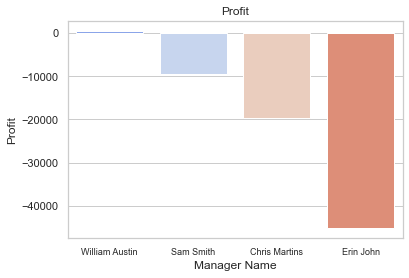

In [11]:
barchart(manager)

<h4>Observations</h4>
<ul>
    <li>Erin John recorded the highest loss 45,218. Which affected his profit as seen in the general analysis.</li>
    <li>William Austin recorded the highest profit $528.5</li>
</ul>

<h3>2. Which Customer Segment is most Profitable?</h3>

In [12]:
#Group the Sales and Profit of table by the customer segment.
cus_segment = pd.DataFrame(table.groupby(['Customer Segment'])[['Profit']].sum().sort_values('Profit', ascending = False))
cus_segment.head()

,Profit
Customer Segment,
Small Business,-1923.455914
Consumer,-14146.012476
Corporate,-24075.741535
Home Office,-33613.342777


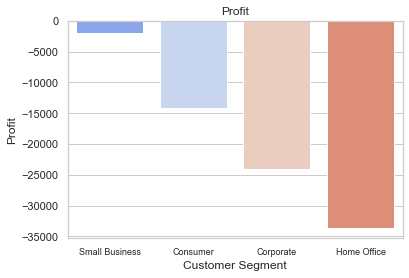

In [13]:
barchart(cus_segment)

<h4>Observations</h4>
<ul>
    <li>Home office customer segment recorded the most loss ($33,613), followed closely by corporate segment $24,075</li>
    <li>Small business recorded the least loss.</li> 
</ul>

<h3>3. Which Product Containers is the most profitable?</h3>

In [14]:
#Group the data by container
container = pd.DataFrame(table.groupby(['Product Container'])[['Profit']].sum().
                         sort_values('Profit', ascending = False))
container

,Profit
Product Container,
Jumbo Drum,4638.514655
Large Box,-27898.816086
Jumbo Box,-50498.251272


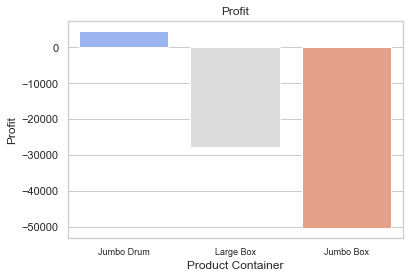

In [15]:
barchart(container)

<h4>Observation</h4>
<ul>
    <li>Jumbo Box, the most preferred container recorded the highest lost.</li>
    <li>Jumbo Drum made the highest profit of all the containers.</li>
    <li>We should cut down the cost of producing Jumbo Box or increase the cost of packaging orders with Jumbo box</li>
</ul>

<h3>4. Which City is the most Profitable?</h3>

In [16]:
#Group the tables by cities and find the aggregate sum of sales, profit.
cities = pd.DataFrame(table.groupby(['City'])[['Profit']].sum().sort_values('Profit', ascending = False))

#Sort the values by sales in a descending order
top_cities = cities[:10].sort_values('Profit',ascending = False)
top_cities

,Profit
City,
Schaumburg,7635.84360
Thornton,6095.86020
South Hadley,4719.32325
Hesperia,3918.54000
Longview,3739.39290
Paducah,3130.61560
Chico,3031.97240
Arvada,2807.28448
Mehlville,2546.48880


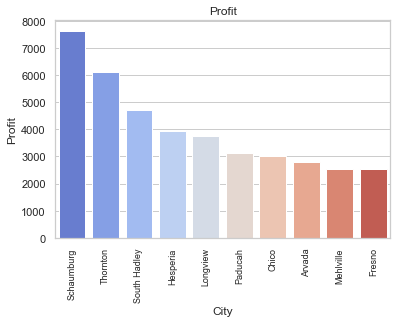

In [17]:
barchart(top_cities, vertical = True)

In [18]:
#Sort the values by sales in a descending order
last_cities = cities[-10:]
last_cities

,Profit
City,
Cumberland,-2312.026288
Miami,-2333.753293
Milwaukee,-2427.122016
South Boston,-2595.650200
Shoreview,-2946.051000
Cedar Park,-3465.072000
Los Angeles,-3594.542420
Dunedin,-3942.873060
Kirkwood,-6474.654000


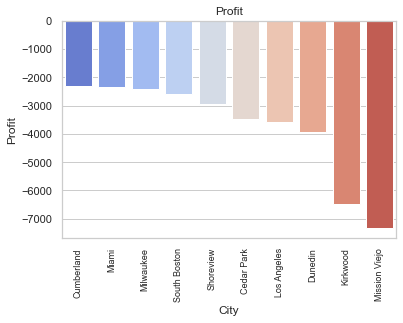

In [19]:
barchart(last_cities, vertical = True)

<h4>Observation</h4>
<ul>
    <li>It is important to note that the top 10 selling cities were not included in the top profitable cities.</li>
    <li>Los Angeles, which sold the most tables is amongst the least 3 profitable cities.</li>
    <li>Mission Viejo is the least profitable city.</li>
</ul>

<h3>5. Which Table type is the Most profitable?</h3>

In [20]:
#Group the data by product name
table_type = pd.DataFrame(table.groupby(['Product Name'])[['Profit']].sum().sort_values('Profit',ascending = False))
table_type

,Profit
Product Name,
"SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black",9219.743518
"Bush® Cubix Conference Tables, Fully Assembled",6597.550200
Bretford CR4500 Series Slim Rectangular Table,5349.056832
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,5241.873596
Hon Rectangular Conference Tables,4969.675080
...,...
Bush Advantage Collection® Round Conference Table,-8264.149777
Hon iLevel™ Computer Training Table,-8563.601096
KI Conference Tables,-10066.260905


In [21]:
#Assign the top selling table types to a variable
top_type = table_type[:10]

#Assign the least selling table types to a variable
last_type = table_type[-10:]

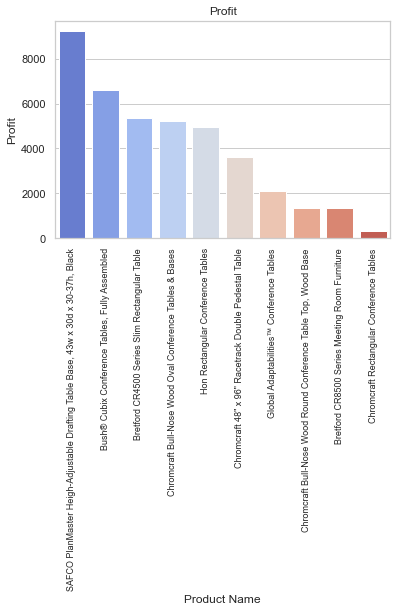

In [22]:
barchart(top_type, vertical = True)

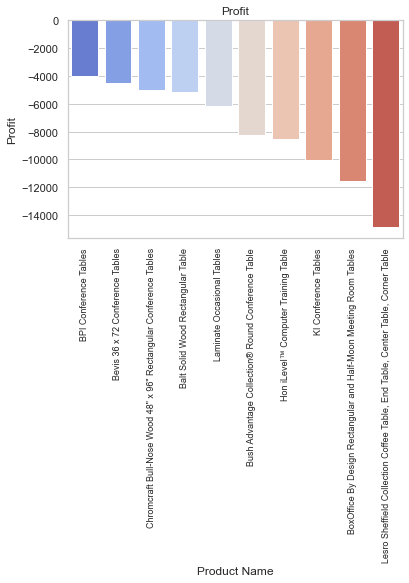

In [23]:
barchart(last_type, vertical = True)

<h4>Observation</h4>
<ul>
    <li>There are a total number of 42 table types, only 10 of them are profitable.</li>
</ul>

<h2>Numerical Analysis</h2>

<h4>Data Exploration</h4>

In [24]:
#List all the columns that aren't numbers, these columns will be removed so we can focus on numbers.
column = ['Unnamed: 0','Order ID','Row ID','Customer ID','Customer Name','Customer Segment','Order Priority','Ship Mode','Product Category',
          'Product Sub-Category','Product Container','Product Name','Manager Name','Region','State or Province','City','Postal Code','Order Date',
          'Ship Date']

#Drop all the non numerical columns using the drop attribute of pandas
num_dataset = table.drop(columns = column, axis = 1)
num_dataset

,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
7,27.75,0.76,1,15.23,0.00,1,-53.784000,24.48,-219.705882
134,69.00,0.68,8,71.37,0.02,3,-595.365120,493.14,-120.729432
141,69.00,0.68,34,71.37,0.02,3,-647.136000,2095.83,-30.877314
186,69.64,0.72,16,218.75,0.06,2,-180.151776,3555.12,-5.067389
197,61.76,0.78,18,286.85,0.10,0,-255.688272,5003.14,-5.110556
...,...,...,...,...,...,...,...,...,...
9093,43.75,0.65,3,146.34,0.09,1,326.580000,333.30,97.983798
9105,29.10,0.68,26,217.85,0.07,4,1.458600,4318.55,0.033775
9106,69.64,0.77,4,218.75,0.03,2,25.002000,765.16,3.267552
9242,51.92,0.69,1,145.98,0.01,2,176.526000,166.16,106.238565


There are 399 rows and 9 columns remaining, our focus is on profit and how other numerical properties affects it.

<h3>Descriptive Statistics</h3>

Although, we have checked the descriptive analysis of all the data including the categorical attributes. Since our focus is on the numerical attributes, we would be looking at the descriptive statistics.

In [25]:
num_dataset.describe()

,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,56.961579,0.687033,12.345865,217.513509,0.050602,2.015038,-184.858528,2433.780201,-32.456139
std,21.682016,0.066977,11.734957,126.768124,0.033047,1.681939,1117.275803,2868.617456,123.571894
min,0.500000,0.512189,1.000000,1.880000,0.000000,0.000000,-6474.654000,5.810000,-715.642405
25%,43.045000,0.640000,5.000000,124.490000,0.020000,1.000000,-526.674331,617.060000,-46.420107
50%,54.120000,0.690000,10.000000,212.600000,0.050000,2.000000,-207.891360,1679.450000,-12.662032
75%,69.000000,0.745000,16.000000,296.180000,0.080000,2.000000,51.000336,3062.475000,4.540941
max,154.120000,0.800000,92.000000,550.980000,0.250000,9.000000,7635.843600,32510.210000,1559.875776


<h4>Observations</h4>
<ul>
    <li>About 25% of our orders for table recorded profit.</li>
</ul>

Although, the subcategory Table has over 40 types each incurring different cost of production, shipping cost, sales value and profit. We don't have enough data to look at the different table types individually, we will focus on analysing the data wholelistically to find the properties that can guaranty us a minimal loss on table purchase. 

<h3>Correlation</h3>
Let's define the correlation between the numerical properties of our orders for table and profit

In [26]:
#Usin corr() we can find the correlation between profit and other numerical attributes
corr = num_dataset.corr()
corr

,Shipping Cost,Product Base Margin,Quantity ordered new,Unit Price,Discount,Delivery(Days),Profit,Sales,Profit Margin%
Shipping Cost,1.000000,0.132238,0.018442,0.226080,0.033870,0.157670,-0.202733,0.151910,-0.101256
Product Base Margin,0.132238,1.000000,0.003748,0.038321,-0.045333,0.060325,-0.144780,0.013994,-0.008099
Quantity ordered new,0.018442,0.003748,1.000000,-0.058182,0.060170,-0.008029,0.094813,0.727622,0.091527
Unit Price,0.226080,0.038321,-0.058182,1.000000,0.079130,0.038636,0.184119,0.453334,0.175669
Discount,0.033870,-0.045333,0.060170,0.079130,1.000000,-0.041751,-0.057325,0.039023,-0.015592
Delivery(Days),0.157670,0.060325,-0.008029,0.038636,-0.041751,1.000000,-0.096084,-0.010758,-0.041766
Profit,-0.202733,-0.144780,0.094813,0.184119,-0.057325,-0.096084,1.000000,0.233022,0.439485
Sales,0.151910,0.013994,0.727622,0.453334,0.039023,-0.010758,0.233022,1.000000,0.171116
Profit Margin%,-0.101256,-0.008099,0.091527,0.175669,-0.015592,-0.041766,0.439485,0.171116,1.000000


Using heatmap, we can visualize the correlation between these fields.

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

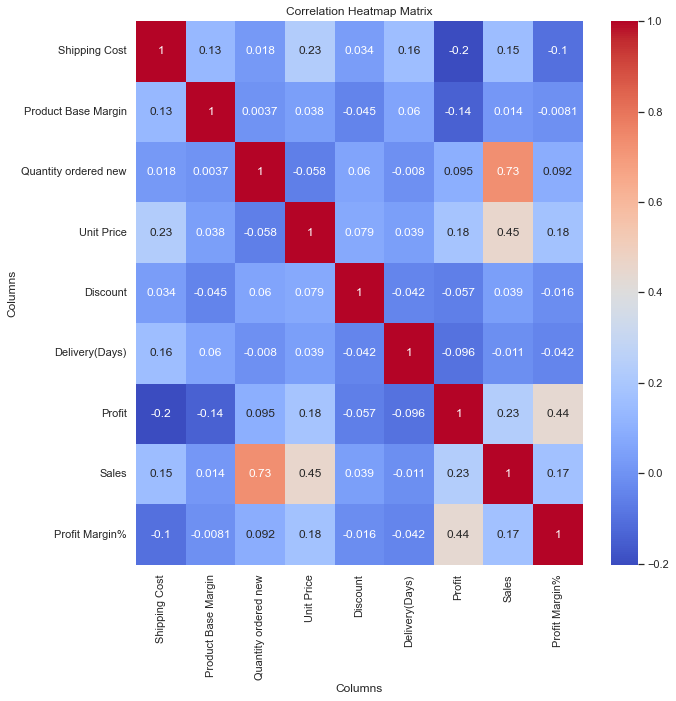

In [27]:
#Set the size of the plot
plt.figure(figsize=(10,10))

#Using seaborn to plot heatmap of our correlation.
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')

#Set labels and titles
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.title('Correlation Heatmap Matrix')

<h3>Observation</h3>
<ul>
    <li>Profit has a very low correlation with other attributes except Profit margin which is understandable because they both measure Loss.</li>
    <li>Profit has the least correlation with Shipping cost, suggesting that as the cost of shipping increases the profit of our orders for table reduces.</li>
    <li>Product Base Margin, Discount and Delivery(Days) all have a negative relationship with profit.</li>
</ul>

<h3>2.How does changes in Shipping cost affect Profit?</h3>
According to the correlation table, the value of our profit decreases as shipping cost increases. Using line plot, let's visualize the effect of changes in shippig cost and how it affects profit.

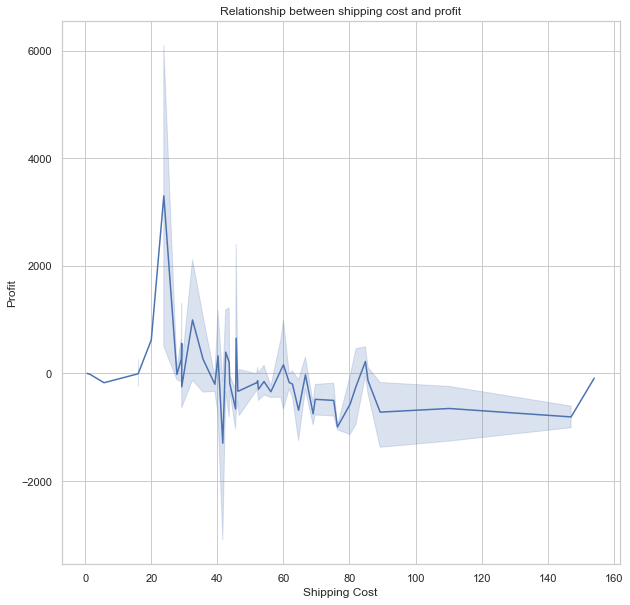

In [28]:
#Set the figure size of the chart
plt.figure(figsize=(10,10))

#Using seaborn to plot the line chart for the relationship between Profit and Shipping cost.
sns.lineplot(x=num_dataset['Shipping Cost'], y = num_dataset['Profit'])

#Set the labels and title of our plot
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.title('Relationship between shipping cost and profit')
plt.show()

<h3>Observation</h3>
<ul>
    <li>We made the highest profit when the shipping cost was within the range of 20 and 40.</li>
</ul>

<h3>How does changes in Product Base Margin affect Profitability?</h3>

Product Base Margin, also known as gross margin is a financial metric that measures the profitability of a product. it is the difference between revenue generated from selling a product and the cost of producing or acquiring that product.

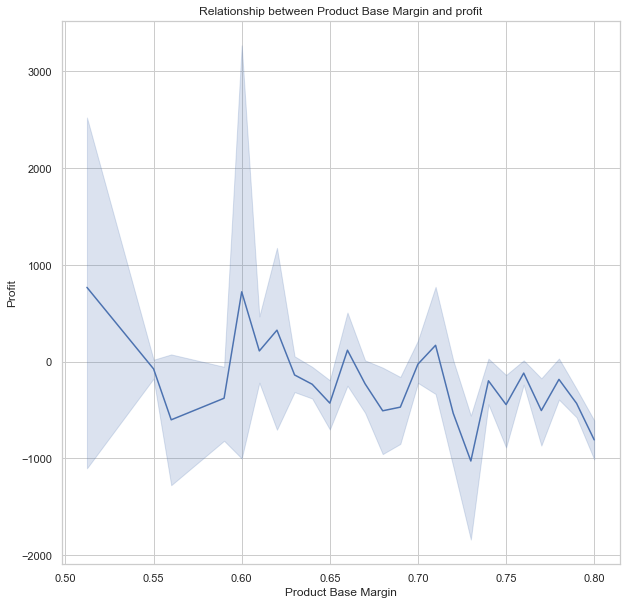

In [29]:
#Set the figure size of the chart
plt.figure(figsize=(10,10))

#Using seaborn to plot the line chart for the relationship between Profit and Shipping cost.
sns.lineplot(x=num_dataset['Product Base Margin'], y = num_dataset['Profit'])

#Set the labels and title of our plot
plt.xlabel('Product Base Margin')
plt.ylabel('Profit')
plt.title('Relationship between Product Base Margin and profit')
plt.show()

<h3>Observation</h3>
<ul>
    <li>A product base margin of 0.6 or less is profitable compared to products with higher product base margin.</li>
</ul>

<h3>How does changes in Discount affect Profit?</h3>

Discounts refers to the reduction in the original price of a product or service.

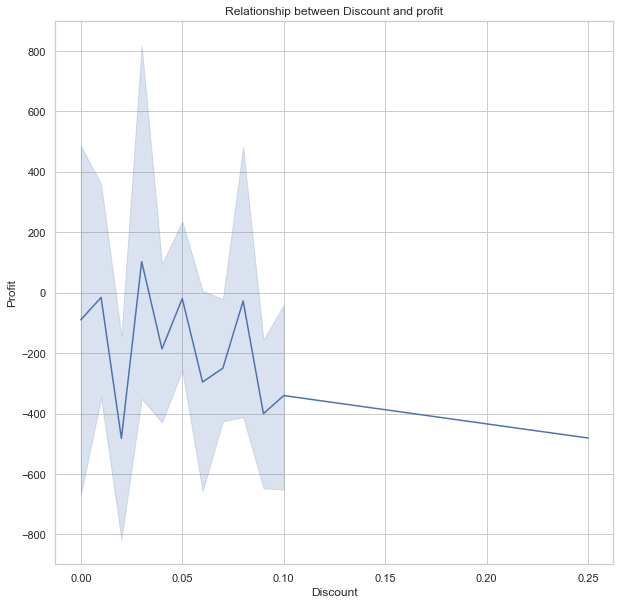

In [30]:
#Set the size of the plot
plt.figure(figsize = (10,10))

#Using seaborn to plot the line chart
sns.lineplot(x=num_dataset['Discount'], y = num_dataset['Profit'])

#Label the x and y axis including the title of the chart
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relationship between Discount and profit')
plt.show()

<h3>Observation</h3>
<ul>
    <li>Discount of 0.05 or less was more profitable for table orders, as discount increases, loss also increases.</li>
</ul>

<h3>Strategic Recommendations</h3>
Let's revist the business questions and make high-leve business recommendations.

<h4>Business Questions</h4>
<ul>
    <li>Which Regional Manager makes the most Profitable?</li>
    <li>Which Customer Segment is the most Profitable?</li>
    <li>Which Product Containers is the most profitable?</li>
    <li>Which City is the most Profitable?</li>
    <li>Which Table type is the Most profitable?</li>
    <li>How does changes in Shipping cost affect Profit?</li>
    <li>How does changes in Product Base Margin affect Profitability?</li>
    <li>How does changes in Discount affect Profit?</li>
</ul>

<h4>Recommendations</h4>
<ul>
    <li>Maintaining a competitive advantage in shipping cost will help reduce loss and increase our profit, ensuring the production cost of order containers and shipping mode is cost efficient.</li>
    <li>We should review the Product Base Margin for table orders higher than 0.6, as profit declines as we increase the product base margin.</li>
    <li>We should discontinue discounts for Table orders or reduce the discount to 0.5 for all orders.</li>
    <li>Let's focus our marketing resources on our top 10 profitable cities.</li>
    <li>Recommend additional analysis for states with the most profit to determine the underlying cost of these losses.</li>
</ul>

<h4>Limitations</h4>
There were limitations to our numerical analysis, we don't have enough data for individual table types to determine the best profitable condition for them as these table types vary in profit base margin, discount, cost production, sales price. Analysis was conducted taking the values as one table type>